<a href="https://colab.research.google.com/github/mirinai/BigdataPhysics_practice/blob/main/week_8_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

house=pd.read_csv('/content/california_house.csv')
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
# 'house' 데이터프레임에서 결측치(NaN)가 있는 모든 행을 제거합니다.
house = house.dropna()

# 'house' 데이터프레임의 인덱스를 재설정합니다. 행이 제거된 후에 인덱스를 다시 설정하는 것이 유용합니다.
# 'drop=True' 옵션은 오래된 인덱스를 데이터프레임의 열로 추가하는 것을 방지합니다.
house = house.reset_index(drop=True)

# 'house' 데이터프레임의 현재 상태를 보기 위해 데이터프레임을 표시합니다.
house



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


(array([175., 546., 626., 496., 392., 258., 166., 105.,  70., 166.]),
 array([ 22500. ,  70250.1, 118000.2, 165750.3, 213500.4, 261250.5,
        309000.6, 356750.7, 404500.8, 452250.9, 500001. ]),
 <BarContainer object of 10 artists>)

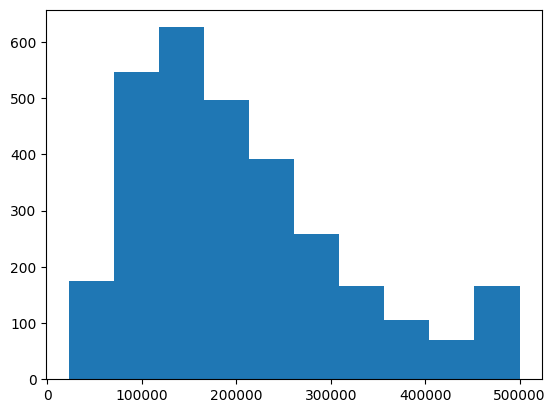

In [ ]:
import matplotlib.pyplot as plt

plt.hist(house["median_house_value"])#distribution

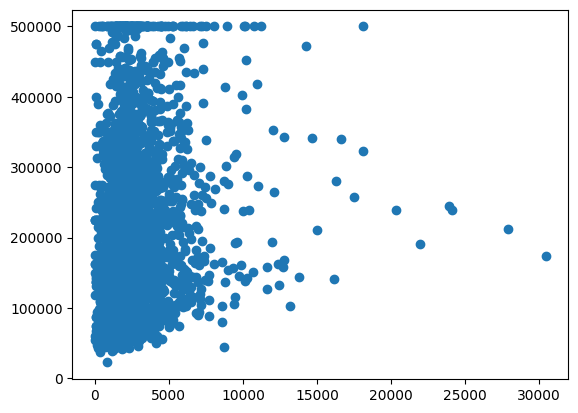

In [ ]:
plt.scatter(house["total_rooms"],house["median_house_value"])

In [ ]:
#Pearson Correlation
import numpy as np

def pearson(a,b):
  return np.mean((a-a.mean())*(b-b.mean())/a.std()/b.std())

def autocorr(data,tau):
  return pearson(data[:-tau],data[:tau])

,date,minimum,average,maximum
0,1907-10-01,7.9,13.5,20.7
1,1907-10-02,7.9,16.2,22.0
2,1907-10-03,13.1,16.2,21.3
3,1907-10-04,11.2,16.5,22.0
4,1907-10-05,10.9,17.6,25.4
...,...,...,...,...
41116,2023-07-27,24.4,28.4,32.2
41117,2023-07-28,25.4,29.5,34.1
41118,2023-07-29,26.1,29.1,33.3
41119,2023-07-30,24.9,28.8,34.9


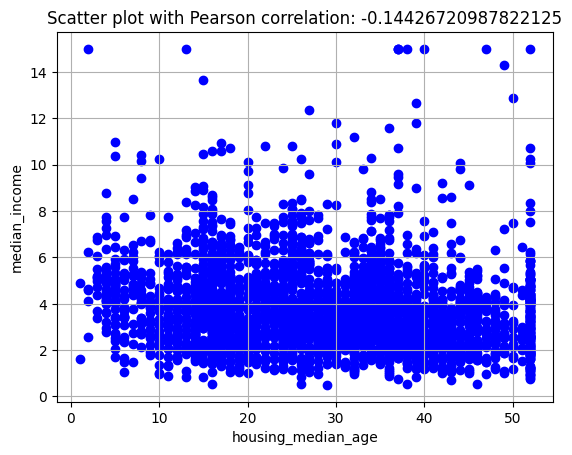

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# 예제 데이터
x = house["housing_median_age"]
y = house["median_income"]

# 상관 계수 계산
correlation = pearson(x, y)

# 데이터 산점도 그리기
plt.scatter(x, y, color='blue')  # 산점도 그리기
plt.title("Scatter plot with Pearson correlation: {}".format(correlation))  # 제목에 상관 계수 표시
plt.xlabel('housing_median_age')  # X 축 레이블
plt.ylabel('median_income')  # Y 축 레이블
plt.grid(True)  # 그리드 표시
plt.show()  # 그래프 표시
'''
피어슨 상관계수가 -1에 가깝다면: 완벽한 음의 선형 관계를 나타냅니다. 한 변수가 증가할 때 다른 하나는 완벽하게 감소합니다.
피어슨 상관계수가 0에 가깝다면: 두 변수 사이에 선형 관계가 거의 또는 전혀 없다는 것을 나타냅니다.
피어슨 상관계수가 1에 가깝다면: 완벽한 양의 선형 관계를 나타냅니다. 한 변수가 증가할 때 다른 하나도 증가합니다.
'''

Text(0, 0.5, 'average temperature in 2021')

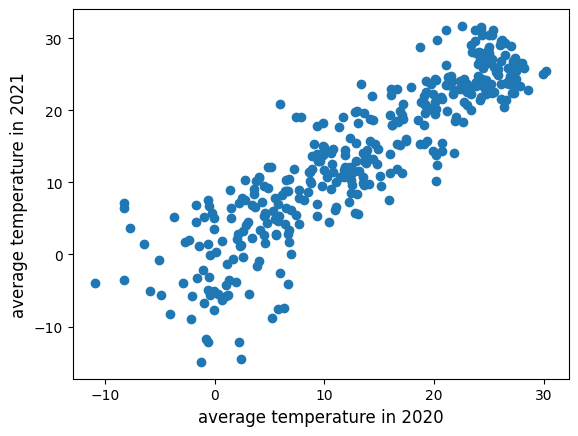

In [ ]:
seoul=pd.read_csv("/content/seoul_alltemp.csv")
seoul
avg2020=seoul["average"][39813:39813+365]
avg2021=seoul["average"][39813+365:39813+2*365]
plt.scatter(avg2020,avg2021)
plt.xlabel("average temperature in 2020",fontsize=12)
plt.ylabel("average temperature in 2021",fontsize=12)

In [ ]:
#Fast Fourier Transform
'''def FFT(x):
  N=len(x)
  if N==1:
    return x# for N =1 X_0=x_0
  w = np.exp(-2*np.pi*1J/N)
  x_even, x_odd = x[0:len(x)-1:2], x[1:len(x):2]
  y_even, y_odd = FFT(x_even), FFT(x_odd)
  y = [0]*N
  for j in range(int(N/2)):
    y[j] = y_even[j]+w**j*y_odd[j]
    y[j+int(N/2)] = y_even[j]-w**j*y_odd[j] # X_k = X*_N-k
  return y'''
import numpy as np

def FFT(x):
    N = len(x)
    # 기본 사례: 입력 데이터가 하나의 요소만 포함하고 있는 경우, 그 요소를 반환
    if N == 1:
        return x

    # N번째 단위근 사용
    w = np.exp(-2 * np.pi * 1J / N)

    # 분할: 입력 배열을 짝수 인덱스와 홀수 인덱스의 배열로 나눔
    x_even = x[0:N:2]  # 모든 짝수 인덱스를 포함하도록 슬라이싱
    x_odd = x[1:N:2]   # 모든 홀수 인덱스를 포함하도록 슬라이싱

    # 정복: 짝수 부분과 홀수 부분에 재귀적으로 FFT 적용
    y_even = FFT(x_even)
    y_odd = FFT(x_odd)

    # 결합: 출력 배열 초기화
    y = [0] * N
    for j in range(N // 2):  # 정수 나눗셈 사용
        # 첫 번째 절반과 대칭되는 두 번째 절반의 값을 계산
        y[j] = y_even[j] + w ** j * y_odd[j]
        y[j + N // 2] = y_even[j] - w ** j * y_odd[j]

    return y

# 예제 사용:
x = np.random.random(8)  # 임의의 데이터 생성
fft_result = FFT(x)
for value in fft_result:
    # 복소수 출력 형식을 'a + bj' 또는 'a - bj' 형태로 조정
    if value.imag >= 0:
        print("FFT 결과: %f + %fj" % (value.real, value.imag))
    else:
        print("FFT 결과: %f - %fj" % (value.real, -value.imag))


FFT 결과: 3.419591 + 0.000000j
FFT 결과: 0.039642 - 0.016198j
FFT 결과: -0.874543 - 0.202756j
FFT 결과: -0.485705 + 0.148104j
FFT 결과: -0.265234 + 0.000000j
FFT 결과: -0.485705 - 0.148104j
FFT 결과: -0.874543 + 0.202756j
FFT 결과: 0.039642 + 0.016198j


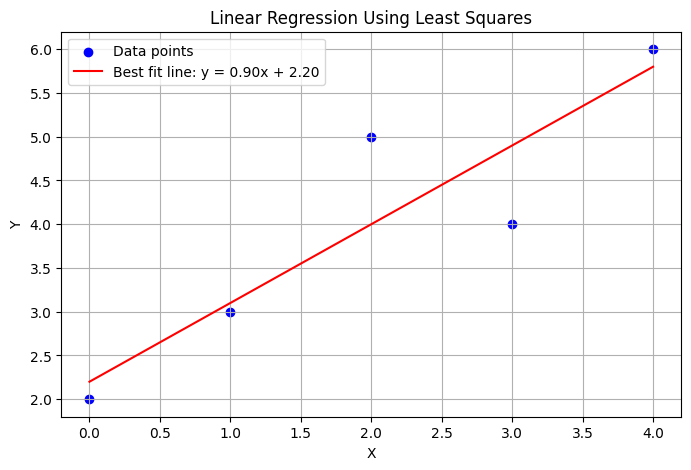

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def least_squares(x, y):
    """
    최소제곱법을 사용하여 선형 회귀 모델 y = ax + b의 계수 a와 b를 구합니다.

    :param x: 독립 변수 x의 값이 담긴 배열
    :param y: 종속 변수 y의 값이 담긴 배열
    :return: 기울기 a와 절편 b
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    S_xx = np.sum(x**2) - len(x) * x_mean**2
    S_xy = np.sum(x * y) - len(x) * x_mean * y_mean
    a = S_xy / S_xx
    b = y_mean - a * x_mean
    return a, b

# 예제 데이터
x = np.array([0, 1, 2, 3, 4])
y = np.array([2, 3, 5, 4, 6])

# 최소제곱법으로 기울기와 절편을 구합니다.
a, b = least_squares(x, y)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Data points')  # 데이터 포인트를 파란색 점으로 표시
plt.plot(x, a * x + b, color='red', label=f'Best fit line: y = {a:.2f}x + {b:.2f}')  # 선형 회귀선을 빨간색 선으로 표시
plt.title('Linear Regression Using Least Squares')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
#Log Log data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fish= pd.read_csv('/content/fish.txt', delimiter='\t')

fish

,Code_ID,Stream,Location,Family,Genus,Species,Scientific_name,Length_mm,Mass_g
0,1,Ebro,Miranda de Ebro,Cyprinidae,Cyprinus,carpio,Cyprinus carpio,442,1700.0
1,1,Ebro,Miranda de Ebro,Cyprinidae,Cyprinus,carpio,Cyprinus carpio,405,1220.0
2,1,Ebro,Miranda de Ebro,Cyprinidae,Cyprinus,carpio,Cyprinus carpio,373,1040.0
3,1,Ebro,Miranda de Ebro,Cyprinidae,Cyprinus,carpio,Cyprinus carpio,199,139.9
4,1,Ebro,Miranda de Ebro,Cyprinidae,Luciobarbus,graellsii,Luciobarbus graellsii,225,133.0
...,...,...,...,...,...,...,...,...,...
12283,118,Ebro,Batea,Cyprinidae,Luciobarbus,graellsii,Luciobarbus graellsii,79,6.9
12284,118,Ebro,Batea,Cyprinidae,Luciobarbus,graellsii,Luciobarbus graellsii,79,7.4
12285,118,Ebro,Batea,Cyprinidae,Luciobarbus,graellsii,Luciobarbus graellsii,110,19.8
12286,118,Ebro,Batea,Cyprinidae,Parachondrostoma,miegii,Parachondrostoma miegii,63,2.8


Text(0, 0.5, 'Mass_g')

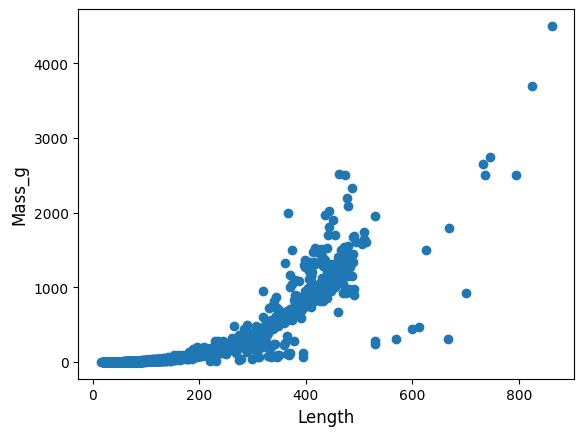

In [28]:
m=fish['Length_mm']
g=fish['Mass_g']
plt.scatter(m,g)
plt.xlabel("Length",fontsize=12)
plt.ylabel('Mass_g',fontsize=12)

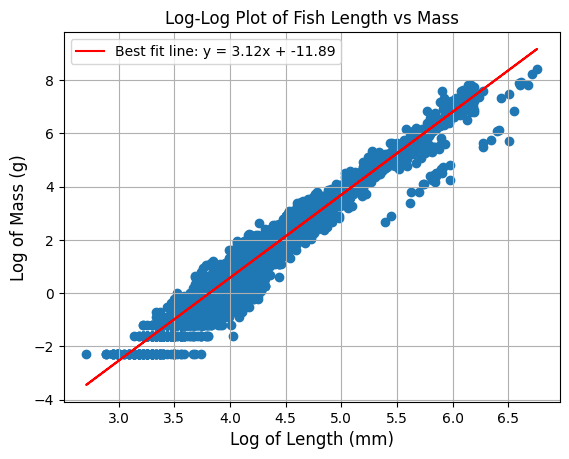

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드, 여기서 'fish'는 이미 로드되어 있는 데이터프레임이라고 가정
m = fish['Length_mm']
g = fish['Mass_g']

# 데이터를 로그 스케일로 변환
log_m = np.log(m)
log_g = np.log(g)

a, b = least_squares(log_m, log_g)

# 로그 스케일 데이터로 scatter plot 그리기
plt.scatter(log_m, log_g)
plt.plot(log_m, a * log_m + b, color='red', label=f'Best fit line: y = {a:.2f}x + {b:.2f}')
plt.xlabel("Log of Length (mm)", fontsize=12)
plt.ylabel('Log of Mass (g)', fontsize=12)
plt.title('Log-Log Plot of Fish Length vs Mass')
plt.legend()
plt.grid(True)  # 그리드 추가
plt.show()


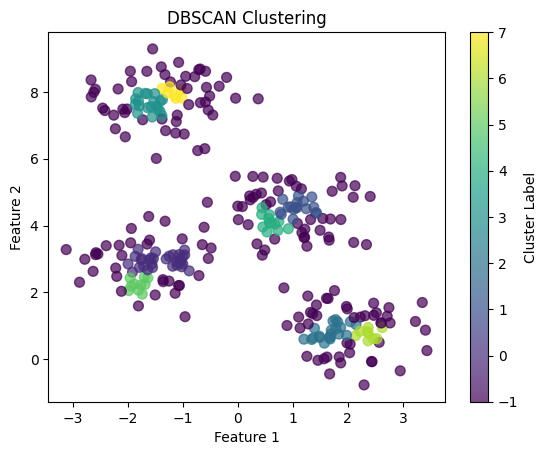

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# 샘플 데이터 생성
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# DBSCAN 모델 생성 및 훈련
dbscan = DBSCAN(eps=0.3, min_samples=10)  # eps는 이웃을 정의하는 최대 거리, min_samples는 핵심 포인트를 정의하는 최소 이웃 수
clusters = dbscan.fit_predict(X)

# 클러스터 결과 시각화
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')